# Part B. Neural Network vs. Perceptron
## Question 2 [Neural Network’s Decision Boundary]
**STEP 1:** Loading datasets Task2B_train.csv and Task2B_test.csv sets and ploting the training data with classes are marked with different colors.

In [1]:
#libraries
library(reshape2)
library(ggplot2)
library(corrplot)

# Load data: 
train <- read.csv('Task2B_train.csv')
test <- read.csv('Task2B_test.csv')

set.seed(12345) # set random seed

#change y column to factor
train$y = as.factor(train$y)
test$y = as.factor(test$y)

corrplot 0.84 loaded


Warning message:
“Removed 2500 rows containing missing values (geom_point).”

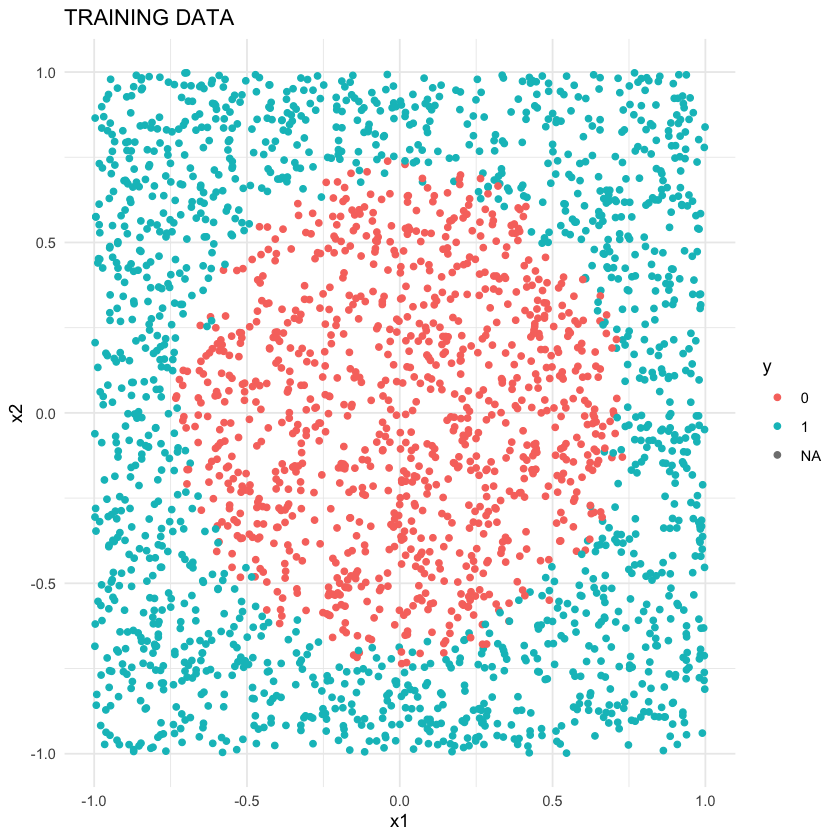

In [2]:
ggplot(data=train, aes(x=x1, y=x2, color=y))  + geom_point() + theme_minimal() + ggtitle("TRAINING DATA")

## Perceptron model
**STEP 2:** Training two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively,and Calculate the test errors of two models and find the best η and its corresponding model.

In [3]:
## Generative parameters
c0 <- '+1'; c1 <- '-1' # class labels

train <- train[complete.cases(train),]
test <- test[complete.cases(test),]

train.data <- train[,-3] # grab all rows, leave out the species (last column)
train.label <- train[,3]
test.data <- test[,-3] # grab all rows, leave out the species (last column)
test.label <- test[,3]

In [4]:

test_data <- as.matrix(cbind(1, test.data))
TT <- ifelse(test.label == '0', eval(parse(text=c0)),eval(parse(text=c1))) # Convention for class labels
train.len = nrow(train.data)
test.len = nrow(test.data)

# Initializatio
epsilon <- 0.001 # Stoping criterion
tau.max <- 100 # Maximum number of iterations
## Basis function 
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

T <- ifelse(train.label == '0', eval(parse(text=c0)),eval(parse(text=c1))) # Convention for class labels

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [5]:


# Main Loop (Step 2):
set.seed(1234) 
#iteration on eta for eta = 0.01 and 0.09
for (eta in seq(0.01,0.09,0.08)){
    tau <- 1 # iteration counter 
    W <- matrix(,nrow=2, ncol=ncol(Phi))
    W[1,] <- runif(ncol(Phi))
    terminate <- FALSE # termination status

while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]

    for (i in 1:train.len){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W[1,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W[2,] <- W[1,]
            W[1,] <- W[1,] + eta * Phi[i,] * T[i]
            
        } 
        
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W[1,])*T<0)/train.len - sum((Phi%*%W[2,])*T<0)/train.len) <= epsilon 
    
}
    
        # calculating missclassified samples on predictions made by model trained on set of every batch of 5 training points
        error = sum((test_data%*%W[1,])*TT<0)
        cat('\nerror for eta ',eta,' is: ',error)   
    cat('\nweights for ',eta,' is: ',W[1,]) 
    
    if (eta == 0.01){
        error1 <- error
        W1 <- W[1,]
        print('done')
    }
        else {
            error2 <- error
            W2 <- W[1,]
        
        }    
  
    }



error for eta  0.01  is:  1226
weights for  0.01  is:  -0.09629659 0.3130195 0.312811[1] "done"

error for eta  0.09  is:  1264
weights for  0.09  is:  0.0005135604 -0.1596298 0.06074064

Ploting the test data while the points are colored with their estimated class labels using the best model that you have selected

In [6]:
if (error1 < error2){W2 <- W1}
test['Prediction_P'] <- ifelse(test_data%*%W2<0, '1','0') #insert predictions to the dataset

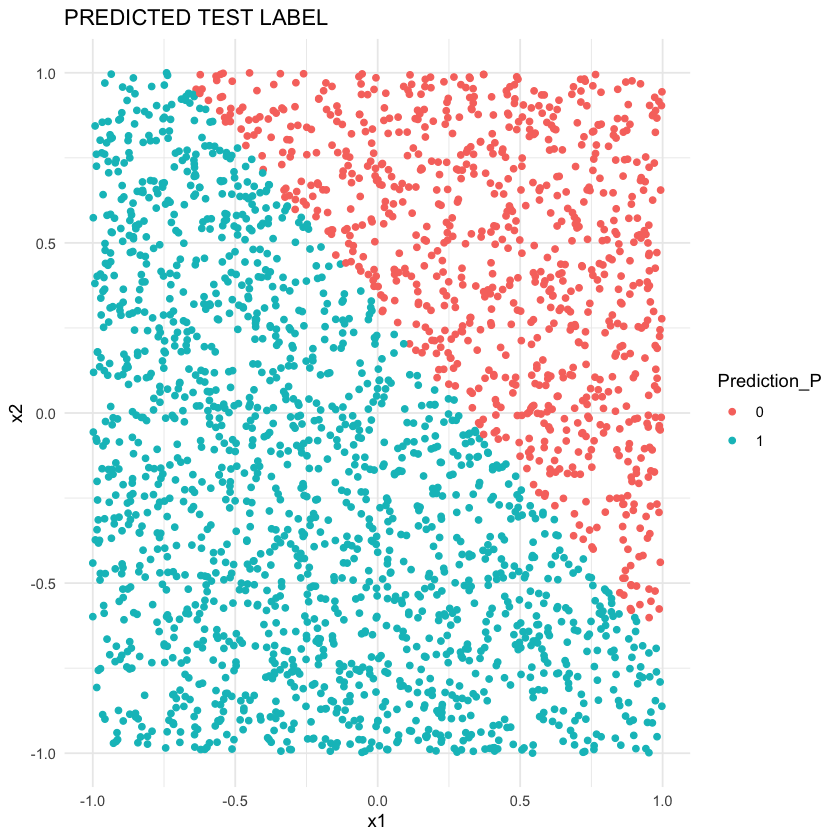

In [8]:
ggplot(data=test, aes(x=x1, y=x2, color=Prediction_P))  + geom_point() + theme_minimal() + ggtitle("PREDICTED TEST LABEL")

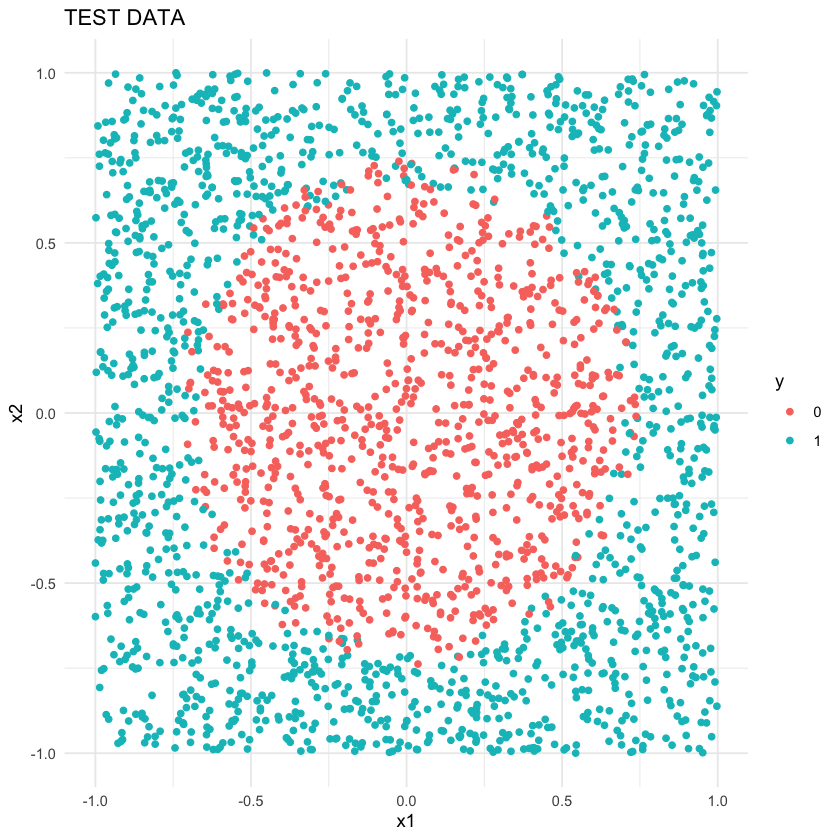

In [9]:
ggplot(data=test, aes(x=x1, y=x2, color=y))  + geom_point() + theme_minimal() + ggtitle("TEST DATA")

## 3-layer Neural Network
**STEP 3:** For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, ..., 100} and μ (learning rate) in {0.01, 0.09}, running the 3-layer Neural Network and recording the testing error for each of them. 

In [10]:
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z) {
  return (1-(h(z))^2)
}
## Class Probabilities
probability <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
prediction <- function(X, W1, W2, b1, b2, threshold=0.5){
  return (ifelse(probability(X, W1, W2, b1, b2)>=threshold, 1, -1))
}
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))

}

##Error 
error <-  function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

## The following structure helps us to have functions with multiple outputs
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
   args <- as.list(match.call())
   args <- args[-c(1:2,length(args))]
   length(value) <- length(args)
   for(i in seq(along=args)) {
     a <- args[[i]]
     if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
   }
   x
}

In [11]:

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}
set.seed(1243)


         # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

In [12]:
NN <- function(K,eta, X1, T1, epoch.max=1000, lambda = 0.01){
  # initialization
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    
  }

  return(list(W1, W2, b1, b2))
}

In [ ]:
K <- seq(5,100,5)  #different numbers of units in hidden layer
errors <- data.frame('K'=K)   # dataframe to store error every time

#iteration for change in number of units: 5,10,15,...
for (k in K){
        
        
        list[W1_0.01, W2_0.01, b1_0.01, b2_0.01] <- NN(k, 0.01, t(as.matrix(X1)), T1)
        list[W1_0.09, W2_0.09, b1_0.09, b2_0.09] <- NN(k, 0.09, t(as.matrix(X1)), T1)
    
        # insert error with respect to coresponding eta value
        errors[k/5,'Eta_0.01'] <- error(prediction(t(as.matrix(X2)), W1_0.01, W2_0.01, b1_0.01, b2_0.01), T2)
        errors[k/5,'Eta_0.09'] <- error(prediction(t(as.matrix(X2)), W1_0.09, W2_0.09, b1_0.09, b2_0.09), T2)

    }
        

In [ ]:
errors

Ploting the error for μ 0.01 and 0.09 vs K (one line for μ 0.01 and another line for μ 0.09 in a plot).

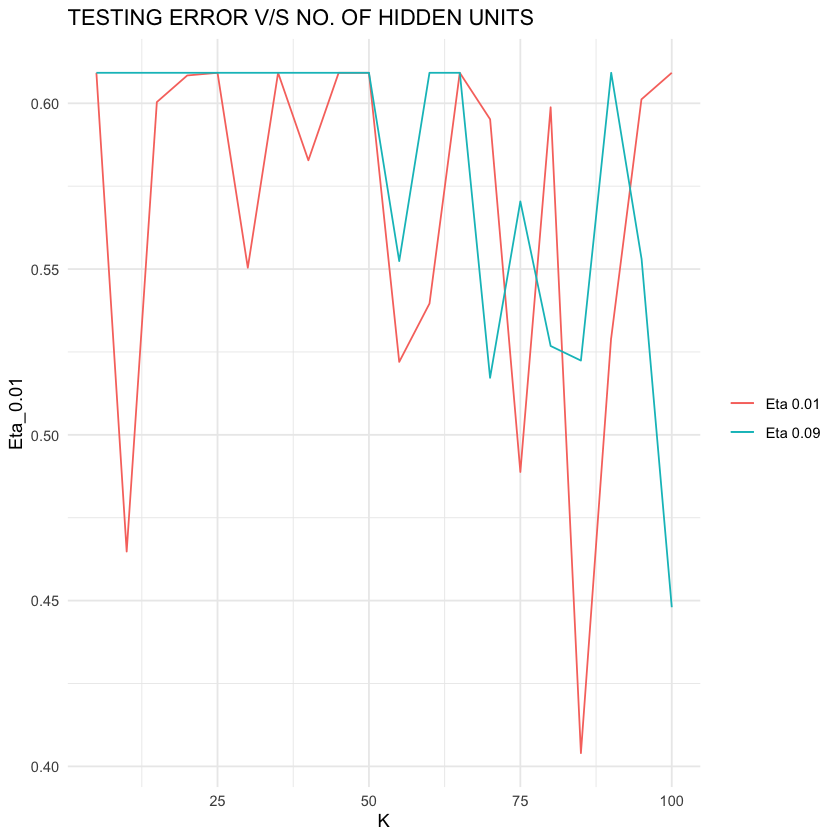

In [101]:
# plot misclassification error of both models for test data set 
ggplot(data=errors) + geom_line(aes(x=K, y=Eta_0.01, color='Eta 0.01')) + geom_line(aes(x=K, y=Eta_0.09, color='Eta 0.09')) +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("TESTING ERROR V/S NO. OF HIDDEN UNITS")

The best combination of K and μ and the corresponding model, then ploting the test data while the points are colored with their estimated class labels using the best model selected.

In [113]:
list[W1, W2, b1, b2] <- NN(k, 0.09, X1, T1)
test['Prediction_NN'] <- prediction(X2, W1, W2, b1, b2)

In [ ]:
ggplot(data=test, aes(x=x1, y=x2, color=Prediction))  + geom_point() + theme_minimal() + ggtitle("TRAINING DATA")